# Histograma de los datos climaticos

## Precipitación

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import PurePath

In [2]:
z22_dir = r'data/zafra2022'

In [53]:
hist_df = pd.DataFrame(columns=['Parcela', 'Lluvia', 'No_lluvia'])

for i in os.listdir(z22_dir):
    if i.endswith('.csv'):
        parcela_id = i.split('.')[0].split('_')[1]
        df = pd.read_csv(PurePath(z22_dir, i))
        lluvia = df.iloc[1, 1]
        no_lluvia = df.iloc[0, 1]

        hist_df = hist_df._append({
            'Parcela': int(parcela_id),
            'Lluvia': int(lluvia),
            'No_lluvia': int(no_lluvia)
        }, ignore_index=True)

In [60]:
hist_df

,Parcela,Lluvia,No_lluvia
0,1,253,146
1,10,227,137
2,11,227,137
3,13,217,97
4,14,230,144
5,15,202,103
6,16,211,109
7,2,206,99
8,3,223,126
9,4,214,110


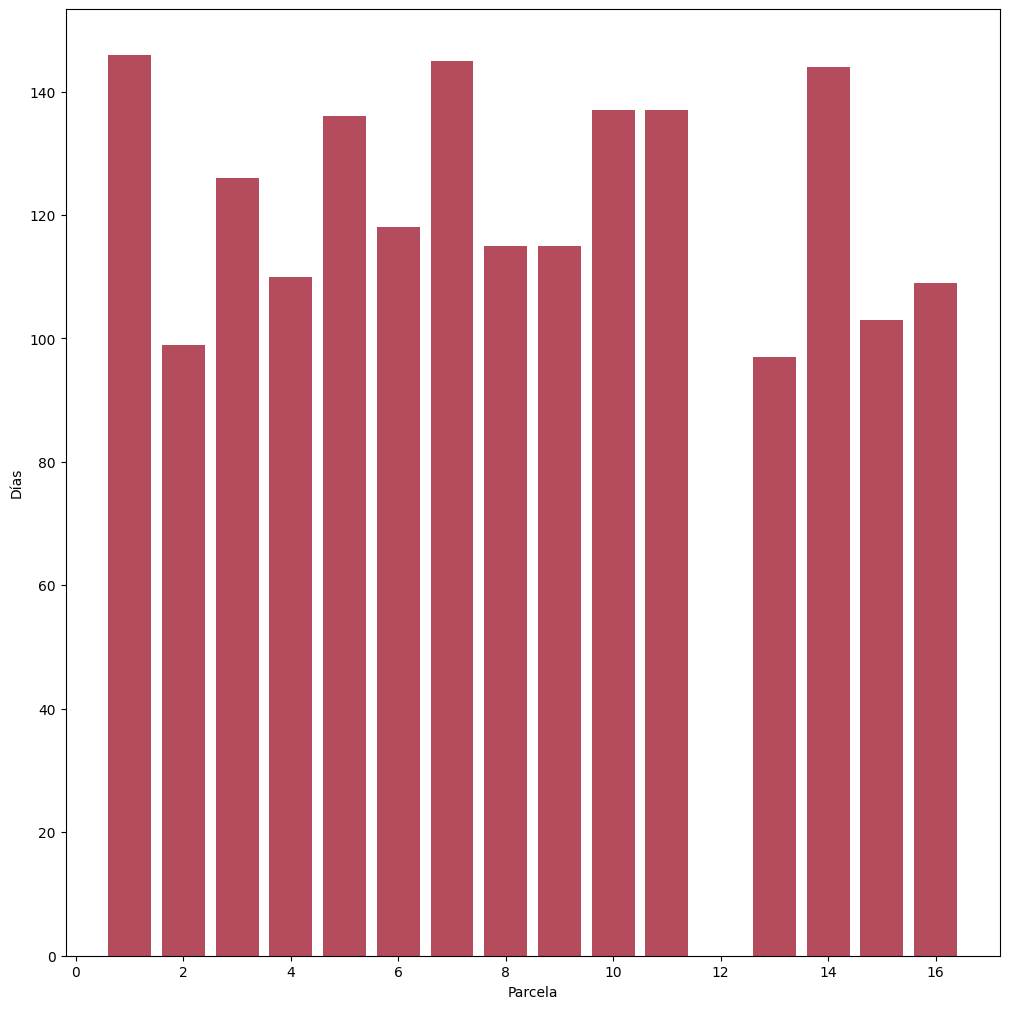

In [31]:
plt.figure(figsize=(10, 10))
plt.bar(hist_df['Parcela'], hist_df['No_lluvia'], color=(150/255, 0, 24/255), alpha=0.7)
plt.tight_layout()
plt.xlabel('Parcela')
plt.ylabel('Días')
plt.savefig('../../tesis_img/sueltas/dias_no_lluvia_22.pdf', dpi=100)
plt.show()

### Correlación con el rendimiento

In [36]:
z22_yield = r'../../results/yield_data/data/zafra22_modelado.csv'

In [37]:
z22_df = pd.read_csv(z22_yield)

In [39]:
z22_df_full = pd.merge(hist_df[['Parcela', 'Lluvia', 'No_lluvia']], z22_df[['parcela', 'rendimiento']], left_on='Parcela', right_on='parcela')

In [44]:
z22_df_full.corr()

,Parcela,Lluvia,No_lluvia,parcela,rendimiento
Parcela,1.000000,-0.407788,-0.190424,1.000000,-0.244834
Lluvia,-0.407788,1.000000,0.760790,-0.407788,0.377630
No_lluvia,-0.190424,0.760790,1.000000,-0.190424,0.353695
parcela,1.000000,-0.407788,-0.190424,1.000000,-0.244834
rendimiento,-0.244834,0.377630,0.353695,-0.244834,1.000000


<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
C:\Users\vival\AppData\Local\Temp\ipykernel_6012\2390960415.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('Rendimiento $ton \cdot ha^{-1}$')


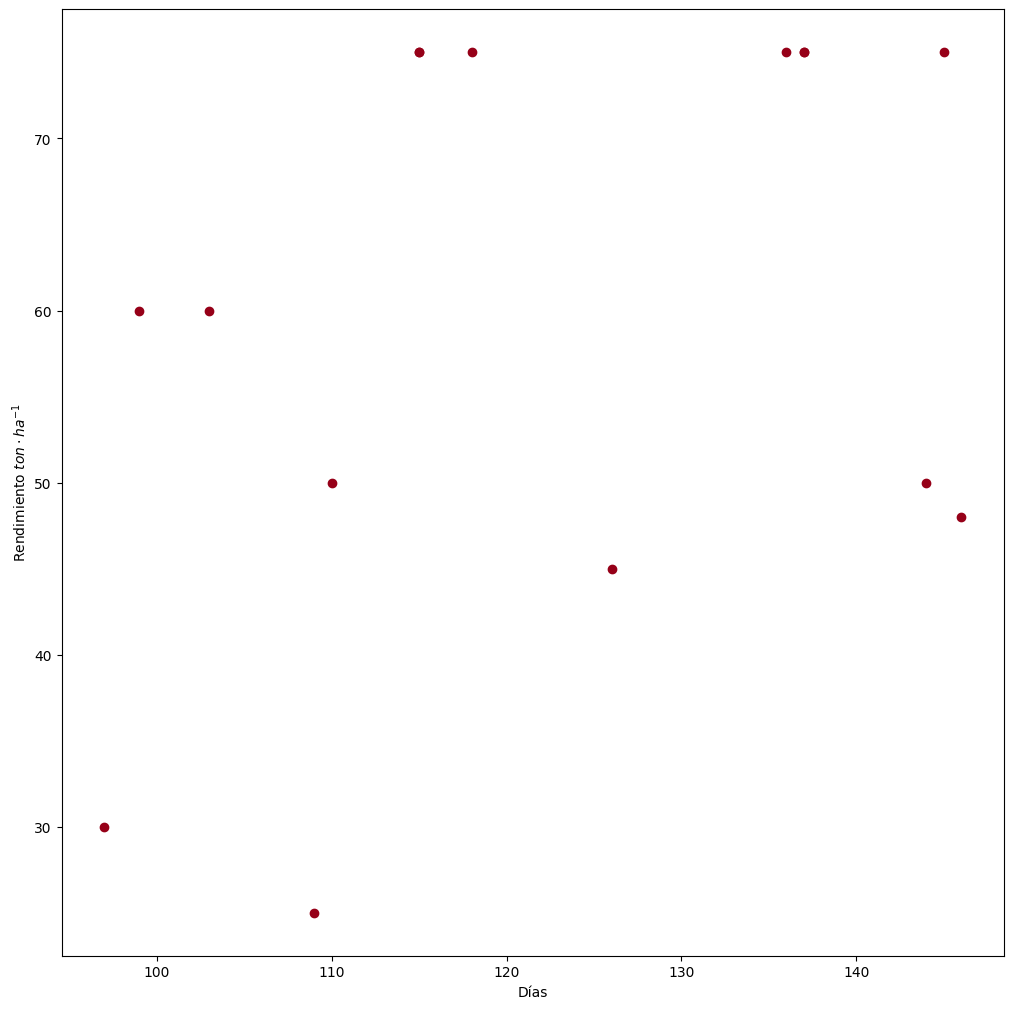

In [50]:
plt.figure(figsize=(10, 10))
plt.scatter(z22_df_full['No_lluvia'], z22_df_full['rendimiento'], color=(150/255, 0, 24/255))
plt.tight_layout()
plt.xlabel('Días')
plt.ylabel('Rendimiento $ton \cdot ha^{-1}$')
plt.savefig('../../tesis_img/sueltas/dias_no_lluvia_rendimiento_22.pdf', dpi=100)
plt.show()